<div class='container' style='border-bottom: 1px solid; width:100%'>
    <div style='float:left'>
    Bernat Esquirol & Pere Gilabert 
    </div>
    <div style='float:right'>
    Complex Networks 2019
    </div>
</div>

# Delivery 02: Macroscale

## The graphs

### Import created graphs

In [3]:
import pandas as pd
import numpy as np
import networkx as nx
from networkx.algorithms import bipartite
from matplotlib import pyplot as plt

%matplotlib inline

To speed up the calculations that follow, we have built networks of 636 and 1029 nodes respectively.
Here you can change the parameter N to switch between the two files we have stored.

In [7]:
# N=[636, 1029]
N = 636

In [8]:
spotify = nx.read_gpickle('../data/network_bipartite_{:d}.gpkl'.format(N))

### Original graph

Spotify network (bipartite graph) with the nodes previously selected with the N parameter.

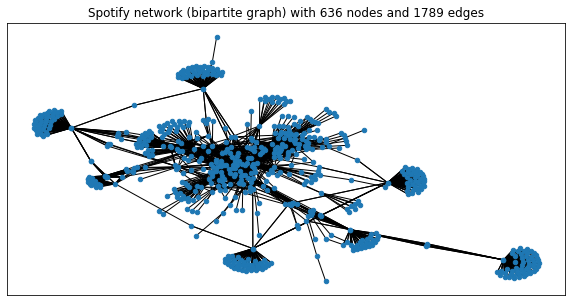

In [9]:
plt.figure(figsize=(10,5))
nx.draw_networkx(spotify, with_labels=False, node_size=20)
plt.title("Spotify network (bipartite graph) with {:d} nodes and {:d} edges".format(len(spotify.nodes), 
                                                                                    len(spotify.edges)))
plt.show()

### Playlists projected graph

Below we can see the projection to the artists' space. There will be a link between two artists if they appear together in a spotify playlist.

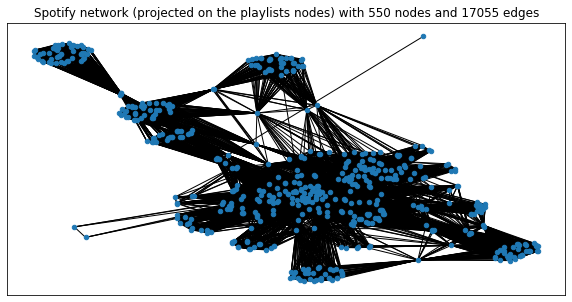

In [13]:
playlists_projection = nx.read_gpickle('../data/playlists_projection_{:d}.gpkl'.format(N))
plt.figure(figsize=(10,5))
plt.title("Spotify network (projected on the playlists nodes) \
with {:d} nodes and {:d} edges".format(len(playlists_projection.nodes), 
                                                    len(playlists_projection.edges)))
nx.draw_networkx(playlists_projection, with_labels=False, node_size=20)
plt.show()

### Artists projected graph

In the same way, we can see the projection to the playlist space. There will be a link between two playlists if they share an artist.

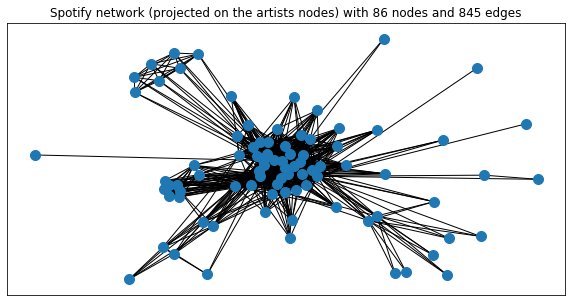

In [14]:
artists_projection = nx.read_gpickle('../data/artists_projection_{:d}.gpkl'.format(N))
plt.figure(figsize=(10,5))
plt.title("Spotify network (projected on the artists nodes) \
with {:d} nodes and {:d} edges".format(len(artists_projection.nodes), 
                                                    len(artists_projection.edges)))
nx.draw_networkx(artists_projection, with_labels=False, node_size=100)
plt.show()

## Metrics

The following metrics have been computed with one of the two graphs, specifically, the playlist graph, which is the larger of the two. To change it, simply uncomment the line and run the following cells again.

In [16]:
G, node_size = playlists_projection, 20
# G, node_size = artists_projection, 100

# Position to draw all the plots with the same network structure
pos = nx.spring_layout(G)

### Radius and Diameter

In [17]:
diamG = nx.diameter(G)
radG = nx.radius(G)
%time print("The radius of this network is {:d} and the diameter is {:d}".format(radG, diamG))

The radius of this network is 3 and the diameter is 5
Wall time: 0 ns


### Centrality, Peripherial nodes and Eccentricity

Computing centrality... DONE
Computing peripherial nodes... DONE
Computing eccentricity... DONE


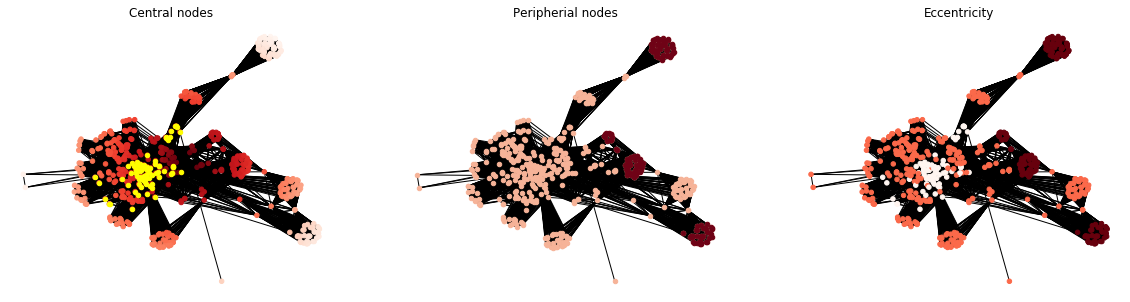

In [18]:
fig = plt.figure(figsize=(20,5))

# 1. Centrality
print("Computing centrality... ",end="")
ax = fig.add_subplot(1,3,1)
ax.set_title("Central nodes")

node_colors = np.array([np.sqrt((xy**2).sum()) for xy in pos.values()])
node_colors = 1-((node_colors-min(node_colors))/(max(node_colors)-min(node_colors)))
nx.draw(G, pos, node_color=node_colors, node_size=node_size, cmap=plt.cm.Reds)

# Compute the center and draw the center nodes in a highlighted color
center = nx.center(G)
nx.draw_networkx_nodes(center, pos, node_size=node_size, node_color='#ffff00')
print("DONE")

# 2. Peripherial nodes
print("Computing peripherial nodes... ",end="")

ax = fig.add_subplot(1,3,2)
ax.set_title("Peripherial nodes")
nx.draw(G, pos, node_size=node_size, node_color='#f6b398')

# Compute the periphery and draw the center nodes in a highlighted color
perip = nx.periphery(G)
nx.draw_networkx_nodes(perip, pos, node_size=node_size, node_color='#6f0216')
print("DONE")


# 3. Excentricity nodes
print("Computing eccentricity... ",end="")

ax = fig.add_subplot(1,3,3)
ax.set_title("Eccentricity")

node_colors = np.array(list(nx.eccentricity(G).values()))
# node_colors = (node_colors-min(node_colors))/(max(node_colors)-min(node_colors))

nx.draw(G, pos, node_color=node_colors, node_size=node_size, cmap=plt.cm.Reds)
print("DONE")


plt.show()

In the previous visualization we can see three different figures.

1. In the first one, the nodes are coloured from darker to lighter depending on their centrality, being the one with the darkest colour, more central. In addition, the nodes that are the center of the network are colored in yellow (nodes returned by the function `x.center(G)`)

2. In the second figure, a distinction is made between two types of nodes, peripheral nodes in a darker color and non-peripheral nodes in a lighter color.

3. Finally, in the third figure the nodes are coloured according to their eccenticity, being the darkest ones the ones with a higher value.

### Shortest paths

Computing radius dijkstra... DONE
Computing diameter dijkstra... DONE


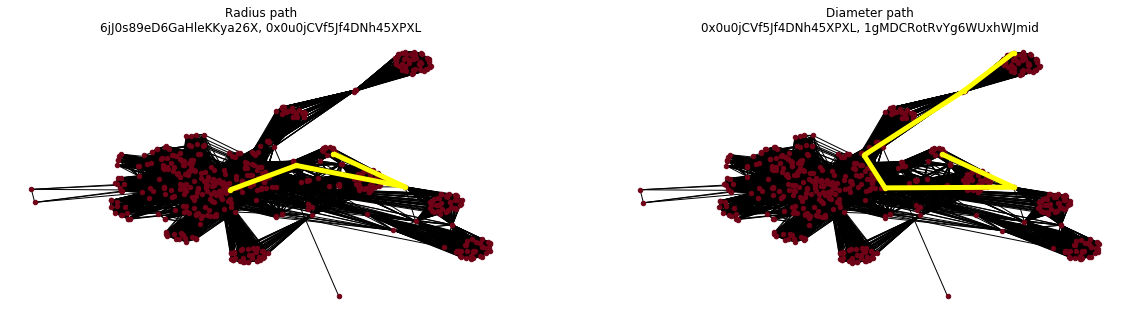

In [19]:
fig = plt.figure(figsize=(20,5))

# 1. Dijkstra (radius)
print("Computing radius dijkstra... ",end="")
ax = fig.add_subplot(1,2,1)
ax.set_title("Radius path")
nx.draw(G, pos, node_size=node_size, node_color='#6f0216')

n1,n2 = nx.center(G)[0], nx.periphery(G)[0]
dij = nx.dijkstra_path(G,n1,n2)

nx.draw_networkx_nodes(dij, pos, node_size=node_size, node_color='#ffff00')
col = nx.draw_networkx_edges(G, pos, 
                       edgelist=list(zip(dij,dij[1:])),
                       node_size=node_size, edge_color='#ffff00', width=5)
ax.set_title("Radius path\n{:s}, {:s}".format(n1, n2))
col.set_zorder(10)
print("DONE")


# 2. Dijkstra (diameter)
print("Computing diameter dijkstra... ",end="")
ax = fig.add_subplot(1,2,2)
nx.draw(G, pos, node_size=node_size, node_color='#6f0216')

# Find nodes with maximum excentricity
sort = sorted(nx.eccentricity(G).items(), key=lambda x: x[1], reverse=True)
candidates = list(map(lambda x: x[0], filter(lambda x: x[1]==sort[0][1], sort)))
for i,j in [(i,j) for i in range(len(candidates)) for j in range(i+1,len(candidates))]:
    dij = nx.dijkstra_path(G,candidates[i], candidates[j])
    
    # Keep a pair of nodes their path is equal to the diameter + 1
    if len(dij)==diamG+1:
        break
ax.set_title("Diameter path\n{:s}, {:s}".format(candidates[i], candidates[j]))

            
nx.draw_networkx_nodes(dij, pos, node_size=node_size, node_color='#ffff00')
col = nx.draw_networkx_edges(G, pos, 
                       edgelist=set(zip(dij,dij[1:])),
                       node_size=node_size, edge_color='#ffff00', width=5)
col.set_zorder(10)


print("DONE")

plt.show()

Here we show two minimum path cases using the `dijkstra_path` function. 

In the figure on the right we choose a center node and a peripheral node to show the minimum path corresponding to a radius. As we can see, the length of this path is consistent with the value returned by the function in section 1.2.1. 

In the same way we look for the minimum path for a diameter. We choose two nodes with maximum eccentricity and we checked that the length of the path is the same as the $\text{diameter+1}$ (since the first and last nodes also count).

### Clustering

As the graph is really centralized, we don't see diferentiated clusters, only onion-layer-like clusters

Computing clustering... DONE


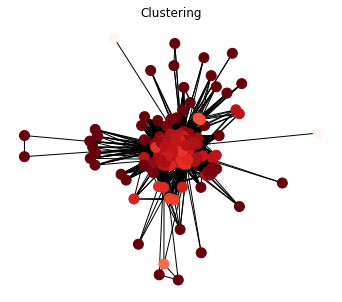

In [285]:
fig = plt.figure(figsize=(20,5))
print("Computing clustering... ",end="")
ax = fig.add_subplot(1,3,1)
ax.set_title("Clustering")

node_colors = np.array(list(nx.clustering(G).values()))
node_colors = (node_colors-min(node_colors))/(max(node_colors)-min(node_colors))
nx.draw(G, pos, node_color=node_colors, node_size=node_size, cmap=plt.cm.Reds)

print("DONE")


### Degree distribution

Here we see the histogram of the frequencies of the degrees of the graph

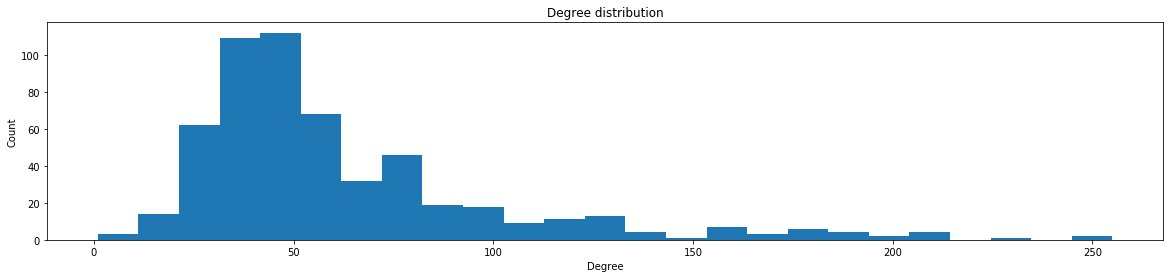

In [20]:
degrees = list(dict(G.degree()).values())
plt.figure(figsize=(20,4))
plt.hist(degrees, bins=25)
plt.title('Degree distribution')
plt.xlabel('Degree')
plt.ylabel('Count')
plt.show()

### Assortativity

Assortativity is the preference for a network's nodes to attach to others that are similar in some way. We see that we have nearly 0 correlation between degrees

In [31]:
nx.degree_assortativity_coefficient(G)

-0.03603209130419759

Let's see if the number of followers of each list has some kind of correlation between neighbours

In [32]:
import spotipy
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [34]:
with open('../cred.txt','r') as file:
    cred = [l.replace("\n", "") for l in file.readlines()]
    
cred = SpotifyClientCredentials(client_id=cred[0], client_secret=cred[1])
sp = spotipy.Spotify(client_credentials_manager=cred)
info_a = {id_a: sp.playlist(id_a) for id_a in list(G.nodes())}
followers_attribute = {k:v['followers']['total'] for k,v in info_a.items()}

for n in G.nodes():
    G.node[n]['followers']=followers_attribute[n]

In [52]:
nx.attribute_assortativity_coefficient(G, 'followers') # even less correlation!

-0.009698104797080873